In [1]:
# JesseRuiz_JosephBurton_nlp_project_Codeup_2019

In [4]:
from requests import get
import requests
from bs4 import BeautifulSoup
import os
import json
from pprint import pprint
import re
import time
import random

import itertools as it
from typing import List, Dict
import pandas as pd

import numpy as np
import unicodedata

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

random_state = 123


### Establish what computer programming languages are...

In [5]:
# Found on https://madnight.github.io/githut/#/pull_requests/2019/1
langs = ['JavaScript',
'Python',
'Java',
'Go',
'C++',
'Ruby',
'PHP',
'TypeScript',
'C#',
'C',
'Shell',
'Scala',
'Swift',
'Rust',
'Kotlin',
'Objective-C',
'Groovy',
'Elixir',
'Lua',
'DM',
'Perl',
'Dart',
'Clojure',
'PowerShell',
'CoffeeScript',
'Haskell',
'OCaml',
'R',
'Emacs Lisp',
'Vim script',
'Jsonnet',
'Erlang',
'Puppet',
'Julia',
'Smalltalk',
'MATLAB',
'WebAssembly',
'Fortran',
'F#',
'Visual Basic',
'Apex',
'ABAP',
'Vala',
'Nix',
'Crystal',
'Roff',
'Perl 6',
'FreeMarker',
'PureScript',
'Objective-C++',
'HTML',
'CSS',
'Vue']

In [6]:
langs = [element.lower() for element in langs]
langs

['javascript',
 'python',
 'java',
 'go',
 'c++',
 'ruby',
 'php',
 'typescript',
 'c#',
 'c',
 'shell',
 'scala',
 'swift',
 'rust',
 'kotlin',
 'objective-c',
 'groovy',
 'elixir',
 'lua',
 'dm',
 'perl',
 'dart',
 'clojure',
 'powershell',
 'coffeescript',
 'haskell',
 'ocaml',
 'r',
 'emacs lisp',
 'vim script',
 'jsonnet',
 'erlang',
 'puppet',
 'julia',
 'smalltalk',
 'matlab',
 'webassembly',
 'fortran',
 'f#',
 'visual basic',
 'apex',
 'abap',
 'vala',
 'nix',
 'crystal',
 'roff',
 'perl 6',
 'freemarker',
 'purescript',
 'objective-c++',
 'html',
 'css',
 'vue']

# Acquire

### General approach to choosing what type of data to scrape from Github: 
#### Use the url: https://github.com/search?o=desc&q=stars%3A%3E1&s=updated&type=Repositories
### This page shows the most recently updates repos on Github.

In [4]:
base_url = 'https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories'

### Each page contains 10 repos... 

### How to find the URLS from many pages on this page: 
https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories

In [5]:
def get_url_list():
    '''Finds a long list of urls based on a max number of pages, which is hardcoded into the function.'''
    urls = []
    headers = {'User-Agent': 'Student'}
    url = 'https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories'
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    max_page = 21
    for i in range(1,max_page):
        url = 'https://github.com/search?o=desc&p=' + str(i) + '&q=stars%3A%3E1&s=updated&type=Repositories/'
        print(f'traversing url: {url}')
        response = get(url, headers=headers)
        soup = BeautifulSoup(response.text)
        page = soup.findAll('li', class_='repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source')
        for div in page:
            repos = []
            repos.append(re.findall(r'.*/.*',div.text)[0])
            urls.append(repos)
        time.sleep(5)
        print(len(urls))        
#         print(urls)
    final_urls = []
    for url in urls:
        url = 'https://github.com/'+url[0]
        final_urls.append(url)
        
        
    return final_urls
            

In [18]:
get_url_list()

traversing url: https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories/
10
traversing url: https://github.com/search?o=desc&p=2&q=stars%3A%3E1&s=updated&type=Repositories/
20
traversing url: https://github.com/search?o=desc&p=3&q=stars%3A%3E1&s=updated&type=Repositories/
30
traversing url: https://github.com/search?o=desc&p=4&q=stars%3A%3E1&s=updated&type=Repositories/
40
traversing url: https://github.com/search?o=desc&p=5&q=stars%3A%3E1&s=updated&type=Repositories/
50
traversing url: https://github.com/search?o=desc&p=6&q=stars%3A%3E1&s=updated&type=Repositories/
60
traversing url: https://github.com/search?o=desc&p=7&q=stars%3A%3E1&s=updated&type=Repositories/
60
traversing url: https://github.com/search?o=desc&p=8&q=stars%3A%3E1&s=updated&type=Repositories/
60
traversing url: https://github.com/search?o=desc&p=9&q=stars%3A%3E1&s=updated&type=Repositories/
70
traversing url: https://github.com/search?o=desc&p=10&q=stars%3A%3E1&s=updated&type=Repositories/
80

['https://github.com/ethereum/solidity-test-bytecode',
 'https://github.com/vauxoo-dev/openacademy-project',
 'https://github.com/nzbget/nzbget',
 'https://github.com/batfish/batfish',
 'https://github.com/brandtbucher/pycapi',
 'https://github.com/graphprotocol/graph-ts',
 'https://github.com/project-flogo/core',
 'https://github.com/rubensolv/MicroRTS',
 'https://github.com/PhoenicisOrg/phoenicis',
 'https://github.com/coreos/kube-prometheus',
 'https://github.com/project-flogo/core',
 'https://github.com/rubensolv/MicroRTS',
 'https://github.com/PhoenicisOrg/phoenicis',
 'https://github.com/coreos/kube-prometheus',
 'https://github.com/flant/logboek',
 'https://github.com/Lombiq/Pretty-Good-Bootstrap-Base-Theme',
 'https://github.com/operator-framework/operator-sdk',
 'https://github.com/plastiqueapp/plastique',
 'https://github.com/conda-forge/feedstocks',
 'https://github.com/keymanapp/keyboards',
 'https://github.com/operator-framework/operator-sdk',
 'https://github.com/plastiqu

## Function name: get_url_list() -> Prints a few statements and then returns a list of strings(urls).
### This is the desired list of urls because we can use this function to find more than 100 repositories. The number of pages to scrape is hard coded into the function.

## Function name: get_repo_all(urls) -> This takes a list of urls and then prints some statements and then returns a dataframe with info. on all urls.

In [7]:
def get_repo_all(urls):
    '''Takes a list of urls and returns a dataframe with the repo title, the repos programming language, the original text of the 
    README file and the number of stars that the repo has. If there were multiple languages, 
    we took the language that had the highest percentage.'''
    good_blobs = []
    read_me_list = []
    language_top = []
    stars = []
    for url in urls:
        response = requests.get(url)        
        soup = BeautifulSoup(response.text)
        read_me = soup.find(class_='markdown-body entry-content p-5')
        
        if read_me != None:
            if soup.find('span', class_='lang') != None:
                language_rm = soup.find('span', class_='lang').text
                language_top.append(language_rm)
            else: 
                language_top.append('None')
                
            if soup.find('a', class_='social-count js-social-count') != None:
                stars.append((re.findall(r'(\d+)', soup.find('a', class_='social-count js-social-count').attrs['aria-label']))[0])
            else:
                stars.append('None')
            read_me_list.append(read_me.text)
            good_blobs.append(url.split('/', 3)[-1])       
            
            print('Total number of repos scraped...', len(good_blobs))
    df = pd.DataFrame(list(zip(good_blobs,language_top, read_me_list, stars)))
    df.columns = ['title', 'language', 'original', 'stars']
    return df

In [11]:
df = get_repo_all(get_url_list())

traversing url: https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories/
10
traversing url: https://github.com/search?o=desc&p=2&q=stars%3A%3E1&s=updated&type=Repositories/
20
traversing url: https://github.com/search?o=desc&p=3&q=stars%3A%3E1&s=updated&type=Repositories/
30
traversing url: https://github.com/search?o=desc&p=4&q=stars%3A%3E1&s=updated&type=Repositories/
40
traversing url: https://github.com/search?o=desc&p=5&q=stars%3A%3E1&s=updated&type=Repositories/
50
traversing url: https://github.com/search?o=desc&p=6&q=stars%3A%3E1&s=updated&type=Repositories/
60
traversing url: https://github.com/search?o=desc&p=7&q=stars%3A%3E1&s=updated&type=Repositories/
70
traversing url: https://github.com/search?o=desc&p=8&q=stars%3A%3E1&s=updated&type=Repositories/
80
traversing url: https://github.com/search?o=desc&p=9&q=stars%3A%3E1&s=updated&type=Repositories/
80
traversing url: https://github.com/search?o=desc&p=10&q=stars%3A%3E1&s=updated&type=Repositories/
80

### Save the dataframe to a CSV file so we can work with it offline (without querying GitHub).

In [12]:
df.to_csv('github_data.csv')

In [13]:
df.head()

,title,language,original,stars
0,IamTinashe/College-Hub,Vue,College-Hub\n\nWeb-based accommodation service...,2
1,EetuPe/Bounce,JavaScript,Bounce\nBounce (or bounce 2 : the ultimate rem...,3
2,machsix/Super-preloader,JavaScript,\n \nSuper-preloader\nDocument\nComplete D...,17
3,dotnet/docs.tr-tr,PowerShell,\n\n\nms.openlocfilehash\nms.sourcegitcommit\n...,8
4,vadxq/pushQQlove,JavaScript,pushQQlove\nweather and to remind of the time ...,2


# Load Data into the Notebook for Preparation, Exploration and Modeling...

### This notebook saves a large dataset with all the repos. Because this is so big, we saved it to a csv. 

## Read in CSV.

# First run of modeling, we acquired about 150 repos to do modeling. -> github_data.csv

# Second run through, we acquired about 522 repos. -> github_large_data.csv

# We will use the second csv file to do work.

In [133]:
# from env import path

### Leaving the work for the first modeling phase below...

In [134]:
file = 'github_large_data.csv'

In [135]:
# df = pd.read_csv(path+file, header='infer')

In [136]:
df = pd.read_csv(file, header='infer')

In [137]:
df.head(3)

,title,language,original,stars
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2


In [138]:
df.shape

(522, 4)

# Prepare

In [139]:
def original_word_count():
    '''This function adds a new column to the dataframe which counts the number of words in the README file'''
    df[['original_cnt']] = df[['original']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.original_cnt[art_num] = len(df['original'][art_num].split())
    df['original_cnt']=df['original_cnt'].astype(int)
    return df

In [140]:
original_word_count()
df.head()

,title,language,original,stars,original_cnt
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2,1
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615


In [141]:
def basic_clean():
    '''This function adds a new column to the dataframe which takes the original README file text and does some cleaning.
    It lower cases, normalizes, encodes and decodes with ascii and utf-8 decoding, then removes special character. 
    Returns the clean text in the new column, article'''
    df[['article']] = df[['original']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        original = df.article[art_num]
        article = re.sub(r'\s', ' ', original).lower()
        normalized = unicodedata.normalize('NFKD', article)
        just_ascii = normalized.encode('ascii', 'ignore')
        article = just_ascii.decode('utf-8')
        without_special_chars = re.sub(r'[^\w\s]', ' ', article)
        word_list = without_special_chars.split()
        article_final = ' '.join(word_list)
        df.article[art_num] = article_final
    return df

In [142]:
basic_clean()

,title,language,original,stars,original_cnt,article
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...
5,JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...
6,yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...
7,alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...
8,opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...
9,dawoudt/JustWatchAPI,Python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...


In [143]:
def article_word_count():
    '''This function adds a new column to the dataframe and does a word count of the article column.'''
    df[['article_cnt']] = df[['article']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.article_cnt[art_num] = len(df['article'][art_num].split())
    df['article_cnt']=df['article_cnt'].astype(int)
    return df

In [144]:
article_word_count()

,title,language,original,stars,original_cnt,article,article_cnt
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797
5,JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482
6,yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293
7,alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11
8,opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45
9,dawoudt/JustWatchAPI,Python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...,409


In [145]:
def article_percent():
    '''This function calculates what percentage of the original text was kept after the basic clean function.'''
    df[['article_per_kept']] = df[['article_cnt']]
    df[['article_per_kept']] = df.article_cnt / df.original_cnt
    df['article_per_kept']=df['article_per_kept'].astype(float)
    return df

In [146]:
article_percent()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1,1.000000
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693
5,JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,1.034335
6,yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,1.592391
7,alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,0.785714
8,opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45,1.285714
9,dawoudt/JustWatchAPI,Python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...,409,1.111413


In [147]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1,1.000000
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693


In [148]:
def lemmatize():
    '''This function adds a new column to the data frame and lemmatizes the article column text.'''
    df[['lemmatized']] = df[['article']]
    art_nums = list(range(df.article.count()))
    wnl = nltk.stem.WordNetLemmatizer()
    for art_num in art_nums:
        lemm_article = df.lemmatized[art_num]
        lemmas = [wnl.lemmatize(word) for word in lemm_article.split()]
        article_lemmatized = ' '.join(lemmas)
        df.lemmatized[art_num] = article_lemmatized
    return df

In [149]:
lemmatize()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...
5,JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,1.034335,mtreering author jingning shi wei xiang licens...
6,yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,1.592391,nlp_xiaojiang augmenttext eda hmm marko syntax...
7,alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,0.785714,site configuration theme build contributing pe...
8,opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45,1.285714,geotiff the key folder where the asciidoc spec...
9,dawoudt/JustWatchAPI,Python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...,409,1.111413,justwatchapi justwatch com python 3 api instal...


In [150]:
def lemm_word_count():
    '''This function adds a new column to the dataframe and does a word count of the lemmatize column.'''
    df[['lemm_cnt']] = df[['article']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.lemm_cnt[art_num] = len(df['lemmatized'][art_num].split())
        
    df.lemm_cnt = df.lemm_cnt.astype(int)
    return df

In [151]:
lemm_word_count()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt
0,NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188
1,morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124
2,u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1
3,AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568
4,joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797
5,JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,1.034335,mtreering author jingning shi wei xiang licens...,482
6,yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,1.592391,nlp_xiaojiang augmenttext eda hmm marko syntax...,293
7,alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,0.785714,site configuration theme build contributing pe...,11
8,opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45,1.285714,geotiff the key folder where the asciidoc spec...,45
9,dawoudt/JustWatchAPI,Python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...,409,1.111413,justwatchapi justwatch com python 3 api instal...,409


### Examine how the lemmatize function worked... It looks like it didn't do TOO much work.

In [152]:
df['article'].iloc[0]

'netbsd netbsd is a free fast secure and highly portable unix like open source operating system it is available for a wide range of platforms from large scale servers and powerful desktop systems to handheld and embedded devices building you can cross build netbsd from most unix like operating systems to build for amd64 x86_64 in the src directory build sh u u j4 m amd64 o obj release additional build information available in the building file binaries daily builds releases testing on a running netbsd system cd usr tests atf run atf report troubleshooting send bugs and patches via web form subscribe to the mailing lists the netbsd users list is a good choice for many problems watch current users if you follow the bleeding edge of netbsd current join the community irc channel netbsd freenode latest sources to fetch the main cvs repository cvs d anoncvs anoncvs netbsd org cvsroot checkout p src to work in the git mirror which is updated every few hours from cvs git clone https github com

In [153]:
df['lemmatized'].iloc[0]

'netbsd netbsd is a free fast secure and highly portable unix like open source operating system it is available for a wide range of platform from large scale server and powerful desktop system to handheld and embedded device building you can cross build netbsd from most unix like operating system to build for amd64 x86_64 in the src directory build sh u u j4 m amd64 o obj release additional build information available in the building file binary daily build release testing on a running netbsd system cd usr test atf run atf report troubleshooting send bug and patch via web form subscribe to the mailing list the netbsd user list is a good choice for many problem watch current user if you follow the bleeding edge of netbsd current join the community irc channel netbsd freenode latest source to fetch the main cv repository cv d anoncvs anoncvs netbsd org cvsroot checkout p src to work in the git mirror which is updated every few hour from cv git clone http github com netbsd src git additio

In [154]:
df.dtypes

title                object
language             object
original             object
stars                 int64
original_cnt          int64
article              object
article_cnt           int64
article_per_kept    float64
lemmatized           object
lemm_cnt              int64
dtype: object

In [155]:
df.language.value_counts()

JavaScript             63
Python                 63
None                   49
Java                   43
C++                    39
HTML                   32
C#                     32
C                      24
Shell                  17
Go                     16
TypeScript             16
PHP                    15
CSS                    14
Rust                   10
Vue                     7
Ruby                    7
R                       6
Scala                   6
Jupyter Notebook        6
Lua                     5
Swift                   4
Emacs Lisp              4
Dart                    4
PowerShell              3
Perl                    3
XSLT                    3
Haskell                 3
Processing              2
Nix                     2
Assembly                2
Clojure                 2
Elixir                  2
Groovy                  2
Kotlin                  2
ShaderLab               1
MATLAB                  1
VHDL                    1
Dockerfile              1
PLpgSQL     

## The number of words stays the same for each file after lemmatization. Some of the words have changed, CSS is now just CS.

In [156]:
df[df.article_cnt != df.lemm_cnt]

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt


### Make sure the language column is lower cased

In [157]:
df['language'] = df['language'].str.lower()

In [158]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188
1,morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124
2,u-simon/springCloudDemo,java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1
3,AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568
4,joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797


In [159]:
df.dtypes

title                object
language             object
original             object
stars                 int64
original_cnt          int64
article              object
article_cnt           int64
article_per_kept    float64
lemmatized           object
lemm_cnt              int64
dtype: object

## Let's remove stopwords and create two more columns, one for the count of words after stopwords removed and another than shows the percentage of words still left.

In [160]:
### FOR SOME REASON THIS FUNCTION IS NOT WORKING WITH THE NEW DATA SO RESORT TO A SIMPLER FUNCTION... SEE NEXT CELL.
# def remove_stopwords(extra_words=None, exclude_words=None):
#     '''This function removes stopwords from the dataframe and returns the dataframe with 4 new columns.
#     The new columns are clean, word_cnt_after_stop, per_stopwords_kept, per_overall_kept.'''
#     wnl = nltk.stem.WordNetLemmatizer()
#     stopwords = nltk.corpus.stopwords.words('english')
#     if extra_words != None:
#         stopwords = stopwords + extra_words
#     if exclude_words != None:
#         stopwords = [word for word in stopwords if word not in exclude_words]
#     #make a new column by copying a column...
#     df[['clean']] = df[['article']]
#     df[['word_cnt_after_stop']] = df[['article']]
#     art_nums = list(range(df.article.count()))
#     for art_num in art_nums:
#         words = df.clean[art_num].split()
#         without_stopwords = [word for word in words if word not in stopwords]
#         df.word_cnt_after_stop[art_num] = len(without_stopwords)
#         without_stopwords_join = ' '.join(without_stopwords)
#         df.clean[art_num] = without_stopwords_join
#     #make a new column by copying a column...
#     df[['per_stopwords_kept']] = df[['title']]
#     df[['per_overall_kept']] = df[['title']]
#     for art_num in art_nums:
#         df.per_stopwords_kept[art_num] = df.word_cnt_after_stop[art_num] / df.lemm_cnt[art_num]
#         df.per_overall_kept = df.word_cnt_after_stop[art_num] / df.original_cnt[art_num]
#     df[['per_stopwords_kept']] = df[['per_overall_kept']].astype(float)
#     df[['word_cnt_after_stop']] = df[['word_cnt_after_stop']].astype(int)
#     df[['per_overall_kept']] = df[['per_overall_kept']].astype(float)
#     return df

In [161]:
def remove_stopwords(string, string_or_list='string', extra_words=None, exclude_words=None):
    """Removes the stopwords from the text then returns it. Able to add or remove stopwords."""
    stopword_list = stopwords.words('english') + langs
    if extra_words != None:
        for word in extra_words:
            stopword_list.append(word)
    if exclude_words != None:
        for word in exclude_words:
            stopword_list.remove(word)
    filtered_words = [word for word in string.split() if word not in stopword_list]
    filtered_string = ' '.join(filtered_words)
    if string_or_list == 'string':
        return filtered_string
    if string_or_list == 'list':
        return filtered_words

In [162]:
df['clean'] = df.article.apply(remove_stopwords)

In [163]:
# df = df.drop(columns=['word_cnt_after_stop'])

In [164]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...
1,morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124,magento2 similar products magento 2 similarity...
2,u-simon/springCloudDemo,java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1,springclouddemo
3,AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568,license amrex copyright 2017 regents universit...
4,joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...


In [165]:
df['word_cnt_after_stop'] = df.clean.str.split().str.len()
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139
1,morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124,magento2 similar products magento 2 similarity...,89
2,u-simon/springCloudDemo,java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1,springclouddemo,1
3,AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568,license amrex copyright 2017 regents universit...,344
4,joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...,1234


In [166]:
df['per_stopwords_kept'] = df.word_cnt_after_stop/df.lemm_cnt
df['per_overall_kept'] = df.word_cnt_after_stop/df.original_cnt

In [167]:
df.head(10)

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
1,morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124,magento2 similar products magento 2 similarity...,89,0.717742,0.801802
2,u-simon/springCloudDemo,java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1,springclouddemo,1,1.000000,1.000000
3,AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568,license amrex copyright 2017 regents universit...,344,0.605634,0.618705
4,joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...,1234,0.686700,0.764087
5,JingningShi/MtreeRing,r,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,1.034335,mtreering author jingning shi wei xiang licens...,482,mtreering authors jingning shi wei xiang licen...,335,0.695021,0.718884
6,yongzhuo/nlp_xiaojiang,python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,1.592391,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...,275,0.938567,1.494565
7,alexherbo2/site,javascript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,0.785714,site configuration theme build contributing pe...,11,site configuration theme builds contributing p...,10,0.909091,0.714286
8,opengeospatial/geotiff,html,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45,1.285714,geotiff the key folder where the asciidoc spec...,45,geotiff key folder asciidoc specification deve...,29,0.644444,0.828571
9,dawoudt/JustWatchAPI,python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...,409,1.111413,justwatchapi justwatch com python 3 api instal...,409,justwatchapi justwatch com 3 api install pytho...,292,0.713936,0.793478


In [168]:
# whoops... try that again. drop these columns
# df = df.drop(columns=['clean', 'word_cnt_after_stop', 'per_stopwords_kept', 'per_overall_kept'])

In [169]:
df.describe()

,stars,original_cnt,article_cnt,article_per_kept,lemm_cnt,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
count,522.000000,522.000000,522.000000,521.000000,522.000000,522.000000,517.000000,521.000000
mean,719.772031,576.588123,615.867816,1.117222,615.867816,431.927203,0.739379,0.835978
std,4742.583926,1494.684231,1561.281931,0.486464,1561.281931,1098.949559,0.139437,0.499396
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.459459,0.000000
25%,3.000000,56.250000,64.000000,1.006494,64.000000,44.000000,0.633745,0.643836
50%,7.000000,190.500000,205.000000,1.060606,205.000000,141.500000,0.699634,0.742160
75%,52.000000,535.500000,561.250000,1.131172,561.250000,387.000000,0.839286,0.880952
max,67185.000000,16193.000000,17248.000000,8.500000,17248.000000,11740.000000,1.000000,8.500000


In [170]:
df[df.per_overall_kept > 1.5].sort_values('per_overall_kept')

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
135,ABadCandy/BaiDuBigData19-URFC,python,BaiDuBigData19-URFC\nmy two networks solution ...,5,40,baidubigdata19 urfc my two networks solution w...,68,1.700000,baidubigdata19 urfc my two network solution wi...,68,baidubigdata19 urfc two networks solution 0 67...,61,0.897059,1.525000
367,Auralcat/my-dotfiles,emacs lisp,My dotfiles.\nInfluences:\n\nhttps://github.co...,3,9,my dotfiles influences https github com shiroy...,17,1.888889,my dotfiles influence http github com shiroyas...,17,dotfiles influences https github com shiroyash...,14,0.823529,1.555556
466,scottwillson/racing_on_rails,ruby,Racing on Rails is a bike racing association s...,37,49,racing on rails is a bike racing association s...,87,1.775510,racing on rail is a bike racing association sc...,87,racing rails bike racing association schedule ...,78,0.896552,1.591837
99,SplendidStrontium/splendidstrontium.github.io,css,splendidstrontium.github.io\n@TODO\n\nsitemap....,2,3,splendidstrontium github io todo sitemap html,6,2.000000,splendidstrontium github io todo sitemap html,6,splendidstrontium github io todo sitemap,5,0.833333,1.666667
204,zqlovejyc/SQLBuilder.Core,c#,SQLBuilder.Core\n项目介绍\n.NET Standard 2.0版本SQLB...,2,7,sqlbuilder core net standard 2 0sqlbuilder htt...,12,1.714286,sqlbuilder core net standard 2 0sqlbuilder htt...,12,sqlbuilder core net standard 2 0sqlbuilder htt...,12,1.000000,1.714286
236,cbuijs/shallalist,none,shallalist\nShallaList unpacked.\nhttp://www.s...,5,4,shallalist shallalist unpacked http www shalla...,7,1.750000,shallalist shallalist unpacked http www shalla...,7,shallalist shallalist unpacked http www shalla...,7,1.000000,1.750000
305,unknown321/mgsv_nuke_watcher,html,https://unknown321.github.io/mgsv_nuke_watcher...,2,8,https unknown321 github io mgsv_nuke_watcher a...,16,2.000000,http unknown321 github io mgsv_nuke_watcher a ...,16,https unknown321 github io mgsv_nuke_watcher s...,15,0.937500,1.875000
48,xndcn/smzdm.com,none,smzdm.com\n,10,1,smzdm com,2,2.000000,smzdm com,2,smzdm com,2,1.000000,2.000000
63,autonomous-robot-competition2019/Team-Green,c++,Team-Green\n,2,1,team green,2,2.000000,team green,2,team green,2,1.000000,2.000000
67,xndcn/smzdm.com,none,smzdm.com\n,10,1,smzdm com,2,2.000000,smzdm com,2,smzdm com,2,1.000000,2.000000


### Exploring the santitation process on our data.

In [171]:
df[df.per_stopwords_kept < .6]

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
58,firstcontributions/first-contributions,none,\n\n\n\nFirst Contributions\nIt's hard. It's a...,6630,676,first contributions it s hard it s always hard...,668,0.988166,first contribution it s hard it s always hard ...,668,first contributions hard always hard first tim...,358,0.535928,0.529586
68,Mindjet/LiteWeather,kotlin,LiteWeather\nThe app is available here.\nScree...,5,7,liteweather the app is available here screenshot,7,1.000000,liteweather the app is available here screenshot,7,liteweather app available screenshot,4,0.571429,0.571429
93,damng/hackernews-rss-with-inlined-content,python,hackernews-rss-inlined-content\nLoads the hack...,10,176,hackernews rss inlined content loads the hacke...,202,1.147727,hackernews r inlined content load the hackerne...,202,hackernews rss inlined content loads hackernes...,117,0.579208,0.664773
101,Ultimate-Hosts-Blacklist/www.shallalist.de,python,About www.shallalist.de\n\n\nAbout Ultimate-Ho...,2,299,about www shallalist de about ultimate hosts b...,328,1.096990,about www shallalist de about ultimate host bl...,328,www shallalist de ultimate hosts blacklist ult...,187,0.570122,0.625418
105,dluciano/pokedex,javascript,\nThe project description can be founded here:...,2,190,the project description can be founded here ch...,195,1.026316,the project description can be founded here ch...,195,project description founded challenge pokedex ...,113,0.579487,0.594737
106,betteridiot/terminal_support,vim script,Terminal_support\nRepo containing files used f...,2,219,terminal_support repo containing files used fo...,236,1.077626,terminal_support repo containing file used for...,236,terminal_support repo containing files used cu...,141,0.597458,0.643836
115,xaos-project/XaoS,c,XaoS\nOriginal Authors: Jan Hubicka and Thomas...,99,378,xaos original authors jan hubicka and thomas m...,387,1.023810,xaos original author jan hubicka and thomas ma...,387,xaos original authors jan hubicka thomas marsh...,226,0.583979,0.597884
122,xaos-project/XaoS,c,XaoS\nOriginal Authors: Jan Hubicka and Thomas...,99,378,xaos original authors jan hubicka and thomas m...,387,1.023810,xaos original author jan hubicka and thomas ma...,387,xaos original authors jan hubicka thomas marsh...,226,0.583979,0.597884
129,Library-of-Kaeon/Library-of-Kaeon,java,Library of Kaeon\nPhilosophy\nThe Library of K...,3,233,library of kaeon philosophy the library of kae...,234,1.004292,library of kaeon philosophy the library of kae...,234,library kaeon philosophy library kaeon pronoun...,128,0.547009,0.549356
130,LambdaSchool/React-UI-Components,html,React-UI-Components\n\nThis repository is desi...,9,1072,react ui components this repository is designe...,1145,1.068097,react ui component this repository is designed...,1145,react ui components repository designed first ...,594,0.518777,0.554104


In [172]:
df[df.original_cnt < 11]

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
2,u-simon/springCloudDemo,java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1,springclouddemo,1,1.000000,1.000000
19,u-simon/springCloudDemo,java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1,springclouddemo,1,1.000000,1.000000
28,fate0/proxylist,html,"proxylist\n\nproxylist, generate by fate0/getp...",444,10,proxylist proxylist generate by fate0 getproxy...,11,1.100000,proxylist proxylist generate by fate0 getproxy...,11,proxylist proxylist generate fate0 getproxy pr...,9,0.818182,0.900000
32,silvernoo/ac-rss,python,AC-RSS\n订阅以下地址\nhttps://raw.githubusercontent....,17,8,ac rss https raw githubusercontent com silvern...,68,8.500000,ac r http raw githubusercontent com silvernoo ...,68,ac rss https raw githubusercontent com silvern...,68,1.000000,8.500000
33,CreatCodeBuild/brutal-algorithm-class,javascript,brutal-algorithm-class\n我所教的课《最强算法班》代码笔记\n,6,2,brutal algorithm class,3,1.500000,brutal algorithm class,3,brutal algorithm class,3,1.000000,1.500000
38,joimxjtuse/FuncTest,java,工作和学习中遇到的一些问题及其整理\n算法\nleet-code\n面试题\n设计模式\n经...,2,8,leet code,2,0.250000,leet code,2,leet code,2,1.000000,0.250000
48,xndcn/smzdm.com,none,smzdm.com\n,10,1,smzdm com,2,2.000000,smzdm com,2,smzdm com,2,1.000000,2.000000
52,PCGen/pcgen,java,How to compile PCGen?\nCheck out our WIKI: htt...,247,9,how to compile pcgen check out our wiki http w...,13,1.444444,how to compile pcgen check out our wiki http w...,13,compile pcgen check wiki http wiki pcgen org b...,9,0.692308,1.000000
54,yin1999/code_sharing,c++,此代码库用于保存我做题或通过其它途径接触到或者解决问题产生代码。\n,2,1,,0,0.000000,,0,,0,NaN,0.000000
59,luyikk/NetX,c#,NetX\n谭释了RPC和ACTOR的完美结合\n,2,2,netx rpcactor,2,1.000000,netx rpcactor,2,netx rpcactor,2,1.000000,1.000000


### Drop repos that have a low wordcount in the Readme file

In [173]:
df = df[df.original_cnt > 10]

In [174]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
1,morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124,magento2 similar products magento 2 similarity...,89,0.717742,0.801802
3,AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568,license amrex copyright 2017 regents universit...,344,0.605634,0.618705
4,joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...,1234,0.686700,0.764087
5,JingningShi/MtreeRing,r,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,1.034335,mtreering author jingning shi wei xiang licens...,482,mtreering authors jingning shi wei xiang licen...,335,0.695021,0.718884


### Now we further filter the dataset so that we only analyze the programming languages that appear most often.

In [175]:
pd.DataFrame(df['language'].value_counts()[df['language'].value_counts()>15])

,language
javascript,59
python,59
none,36
c++,34
java,33
c#,27
html,24
c,24
typescript,16
shell,16


In [176]:
top_langs = pd.DataFrame(df['language'].value_counts()[df['language'].value_counts()>15])
top_langs.reset_index(inplace=True)
top_langs.columns = ['language', 'count']
top_langs

,language,count
0,javascript,59
1,python,59
2,none,36
3,c++,34
4,java,33
5,c#,27
6,html,24
7,c,24
8,typescript,16
9,shell,16


## Whereas in the first modeling phase, we focused on the languages that occured more than 5 times, since we have more data, we can focus on the languages that occur more than 15 times in the dataset. 

## This gives us 11 programming languages.

In [177]:
top_langs_list = list(top_langs.language)
top_langs_list

['javascript',
 'python',
 'none',
 'c++',
 'java',
 'c#',
 'html',
 'c',
 'typescript',
 'shell',
 'go']

## Still preparing the dataframe for analysis...

In [178]:
df = pd.merge(df, top_langs, on='language', how='inner')
df

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept,count
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485,36
1,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485,36
2,sunsettrack4/xmltv_epg,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397,36
3,andrewrothstein/ansible-vagrant,none,andrewrothstein.vagrant\n\nInstalls vagrant\nR...,2,28,andrewrothstein vagrant installs vagrant requi...,37,1.321429,andrewrothstein vagrant installs vagrant requi...,37,andrewrothstein vagrant installs vagrant requi...,37,1.000000,1.321429,36
4,voken100g/AutoSSR,none,Free ShadowsocksR免费 ShadowsocksR 服务\nLatest up...,27,616,free shadowsocksr shadowsocksr latest update a...,616,1.000000,free shadowsocksr shadowsocksr latest update a...,616,free shadowsocksr shadowsocksr latest update s...,615,0.998377,0.998377,36
5,tolo7010/hak.lnk,none,hak.lnk\nProject Name: hak.lnk\nDescription: R...,18,64,hak lnk project name hak lnk description resou...,59,0.921875,hak lnk project name hak lnk description resou...,59,hak lnk project name hak lnk description resou...,48,0.813559,0.750000,36
6,firstcontributions/first-contributions,none,\n\n\n\nFirst Contributions\nIt's hard. It's a...,6630,676,first contributions it s hard it s always hard...,668,0.988166,first contribution it s hard it s always hard ...,668,first contributions hard always hard first tim...,358,0.535928,0.529586,36
7,tolo7010/hak.lnk,none,hak.lnk\nProject Name: hak.lnk\nDescription: R...,18,64,hak lnk project name hak lnk description resou...,59,0.921875,hak lnk project name hak lnk description resou...,59,hak lnk project name hak lnk description resou...,48,0.813559,0.750000,36
8,MarkMoHR/Awesome-Image-Colorization,none,Awesome-Image-Colorization\nA collection of De...,11,562,awesome image colorization a collection of dee...,616,1.096085,awesome image colorization a collection of dee...,616,awesome image colorization collection deep lea...,562,0.912338,1.000000,36
9,jdlingyu/ad-wars,none,大圣净化 使用帮助\n应用下载地址(捐赠版本需激活码)\n\nhttps://fir.im/...,24,29,https fir im adwars viewid xposed telegram 404...,11,0.379310,http fir im adwars viewid xposed telegram 404 ...,11,https fir im adwars viewid xposed telegram 404...,11,1.000000,0.379310,36


In [179]:
df.drop(columns='count', inplace=True)
df.head(3)

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
1,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
2,sunsettrack4/xmltv_epg,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397


In [180]:
df = df[df.original_cnt > 10]

## Visualize

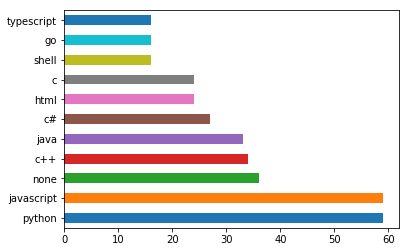

In [181]:
df.language.value_counts().plot.barh()


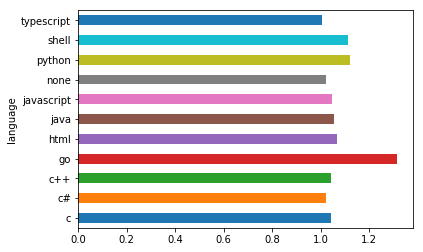

In [182]:
df.groupby('language')['article_per_kept'].mean().plot.barh()


In [183]:
df.dtypes

title                   object
language                object
original                object
stars                    int64
original_cnt             int64
article                 object
article_cnt              int64
article_per_kept       float64
lemmatized              object
lemm_cnt                 int64
clean                   object
word_cnt_after_stop      int64
per_stopwords_kept     float64
per_overall_kept       float64
dtype: object

In [184]:
mean_df = df.groupby('language').mean()
mean_df

,stars,original_cnt,article_cnt,article_per_kept,lemm_cnt,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
language,,,,,,,,
c,2642.750000,492.291667,517.833333,1.041935,517.833333,346.166667,0.696015,0.725241
c#,109.925926,646.888889,668.370370,1.021641,668.370370,465.037037,0.716545,0.717975
c++,1517.117647,1023.676471,1091.500000,1.042726,1091.500000,723.647059,0.705523,0.740027
go,446.250000,578.875000,763.562500,1.314481,763.562500,591.750000,0.732732,1.015076
html,40.291667,1192.500000,1197.333333,1.065298,1197.333333,845.750000,0.708806,0.748260
java,776.878788,392.484848,414.424242,1.052872,414.424242,282.818182,0.728920,0.769214
javascript,207.152542,702.847458,747.711864,1.045074,747.711864,505.220339,0.694892,0.726412
none,405.694444,539.972222,606.250000,1.023266,606.250000,474.222222,0.791017,0.801868
python,3125.627119,816.440678,847.169492,1.120761,847.169492,600.389831,0.695447,0.788202


In [185]:
mean_df[['Words Gained During Basic Clean']] = mean_df[['original_cnt']]
mean_df[['Words Lost After Stop Words']] = mean_df[['original_cnt']]
mean_df[['Words Gained During Basic Clean']] = pd.DataFrame(mean_df.article_cnt - mean_df.original_cnt)
mean_df[['Words Lost After Stop Words']] = pd.DataFrame(mean_df['article_cnt'] - mean_df['word_cnt_after_stop'])
mean_df

,stars,original_cnt,article_cnt,article_per_kept,lemm_cnt,word_cnt_after_stop,per_stopwords_kept,per_overall_kept,Words Gained During Basic Clean,Words Lost After Stop Words
language,,,,,,,,,,
c,2642.750000,492.291667,517.833333,1.041935,517.833333,346.166667,0.696015,0.725241,25.541667,171.666667
c#,109.925926,646.888889,668.370370,1.021641,668.370370,465.037037,0.716545,0.717975,21.481481,203.333333
c++,1517.117647,1023.676471,1091.500000,1.042726,1091.500000,723.647059,0.705523,0.740027,67.823529,367.852941
go,446.250000,578.875000,763.562500,1.314481,763.562500,591.750000,0.732732,1.015076,184.687500,171.812500
html,40.291667,1192.500000,1197.333333,1.065298,1197.333333,845.750000,0.708806,0.748260,4.833333,351.583333
java,776.878788,392.484848,414.424242,1.052872,414.424242,282.818182,0.728920,0.769214,21.939394,131.606061
javascript,207.152542,702.847458,747.711864,1.045074,747.711864,505.220339,0.694892,0.726412,44.864407,242.491525
none,405.694444,539.972222,606.250000,1.023266,606.250000,474.222222,0.791017,0.801868,66.277778,132.027778
python,3125.627119,816.440678,847.169492,1.120761,847.169492,600.389831,0.695447,0.788202,30.728814,246.779661


In [186]:
mean_df = mean_df.reset_index()
mean_df

,language,stars,original_cnt,article_cnt,article_per_kept,lemm_cnt,word_cnt_after_stop,per_stopwords_kept,per_overall_kept,Words Gained During Basic Clean,Words Lost After Stop Words
0,c,2642.750000,492.291667,517.833333,1.041935,517.833333,346.166667,0.696015,0.725241,25.541667,171.666667
1,c#,109.925926,646.888889,668.370370,1.021641,668.370370,465.037037,0.716545,0.717975,21.481481,203.333333
2,c++,1517.117647,1023.676471,1091.500000,1.042726,1091.500000,723.647059,0.705523,0.740027,67.823529,367.852941
3,go,446.250000,578.875000,763.562500,1.314481,763.562500,591.750000,0.732732,1.015076,184.687500,171.812500
4,html,40.291667,1192.500000,1197.333333,1.065298,1197.333333,845.750000,0.708806,0.748260,4.833333,351.583333
5,java,776.878788,392.484848,414.424242,1.052872,414.424242,282.818182,0.728920,0.769214,21.939394,131.606061
6,javascript,207.152542,702.847458,747.711864,1.045074,747.711864,505.220339,0.694892,0.726412,44.864407,242.491525
7,none,405.694444,539.972222,606.250000,1.023266,606.250000,474.222222,0.791017,0.801868,66.277778,132.027778
8,python,3125.627119,816.440678,847.169492,1.120761,847.169492,600.389831,0.695447,0.788202,30.728814,246.779661
9,shell,152.187500,461.000000,481.125000,1.113964,481.125000,336.000000,0.678672,0.749608,20.125000,145.125000


In [187]:
mean_df.rename(columns = {'word_cnt_after_stop': 'Final Word Count'}, inplace=True)

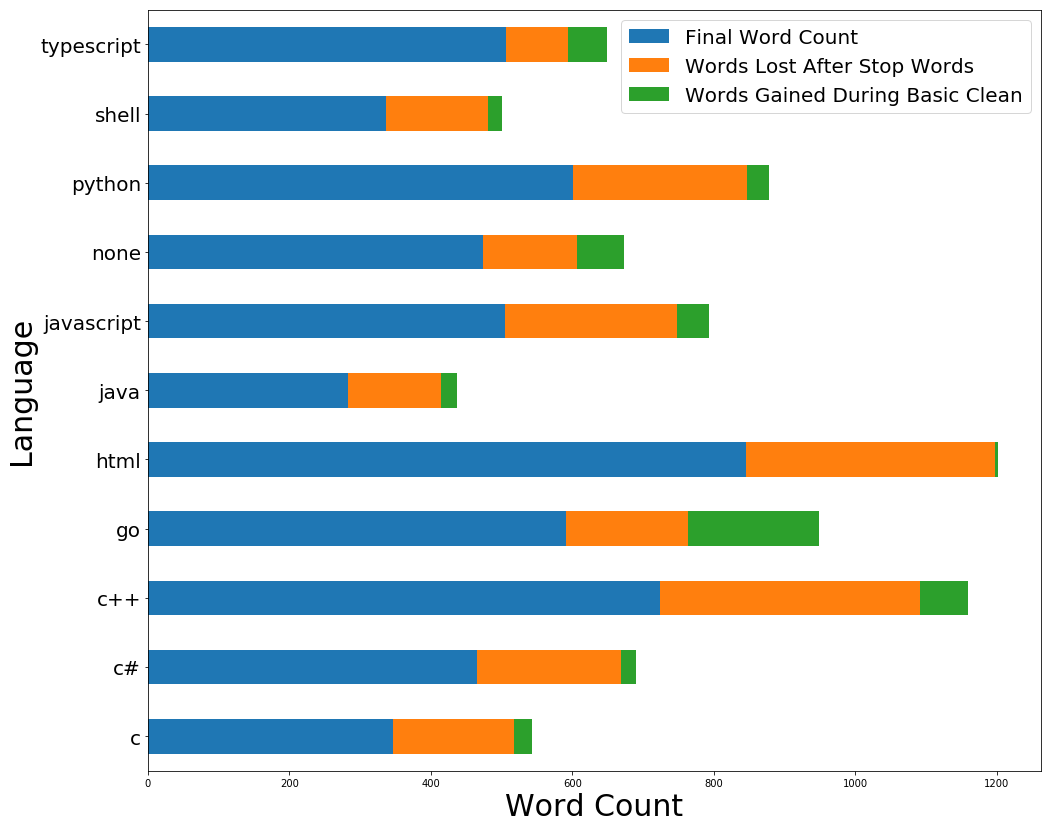

In [188]:
mean_df[['Final Word Count', 'Words Lost After Stop Words', 'Words Gained During Basic Clean']].plot.barh(stacked=True, figsize=(16, 14))
plt.ylabel('Language', fontsize=30, rotation=90)
plt.xlabel('Word Count', fontsize=30)
ticks, labels = plt.yticks()
labels = mean_df.language
plt.yticks(ticks, labels, fontsize=20)
plt.legend(fontsize=20)
plt.show()

# Exploration

In [189]:
def df_info():
    cols = ['stars',
 'original_cnt',
 'article_cnt',
 'article_per_kept',
 'lemm_cnt',
 'word_cnt_after_stop',
 'per_stopwords_kept',
 'per_overall_kept']
    
    for col in cols:
        print(str(col) + ':')
        print(pd.DataFrame(df.groupby('language')[col].describe().T))

In [190]:
df_info()


stars:
language            c           c#           c++           go        html  \
count        24.00000    27.000000     34.000000    16.000000   24.000000   
mean       2642.75000   109.925926   1517.117647   446.250000   40.291667   
std        6452.42444   280.916895   4844.453935   754.622952   81.914844   
min           2.00000     2.000000      2.000000     2.000000    2.000000   
25%           5.00000     4.000000      5.000000    11.750000    2.000000   
50%          49.00000     7.000000     81.000000    32.500000    6.000000   
75%        1960.50000    47.000000    716.250000   539.250000   21.250000   
max       23158.00000  1313.000000  27940.000000  2753.000000  285.000000   

language          java   javascript         none        python        shell  \
count        33.000000    59.000000    36.000000     59.000000    16.000000   
mean        776.878788   207.152542   405.694444   3125.627119   152.187500   
std        2557.694711   912.974370  1304.855806  12500.545933

In [191]:
def groupby_language_mean_plots():
    cols = ['stars',
 'original_cnt',
 'article_cnt',
 'article_per_kept',
 'lemm_cnt',
 'word_cnt_after_stop',
 'per_stopwords_kept',
 'per_overall_kept']
    
    for col in cols:
        print(str(col) + ':')
        plot = df.groupby('language')[col].mean().plot.barh()
        plt.show()

stars:


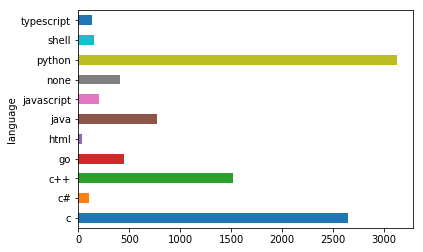

original_cnt:


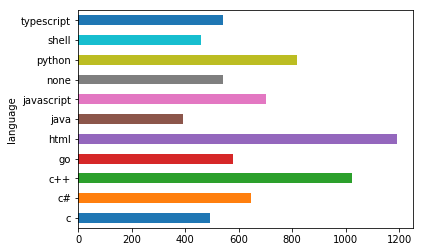

article_cnt:


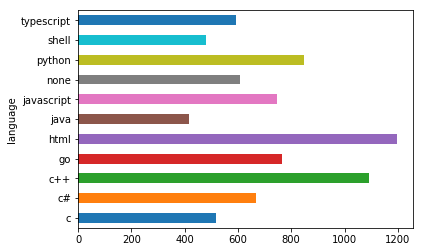

article_per_kept:


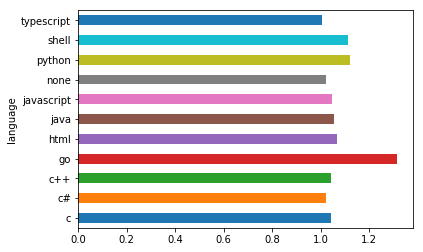

lemm_cnt:


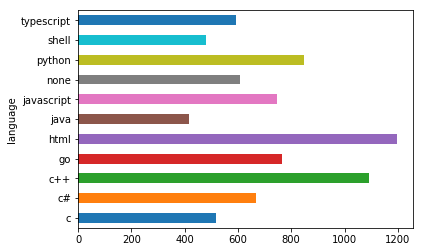

word_cnt_after_stop:


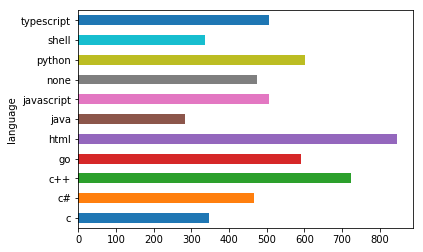

per_stopwords_kept:


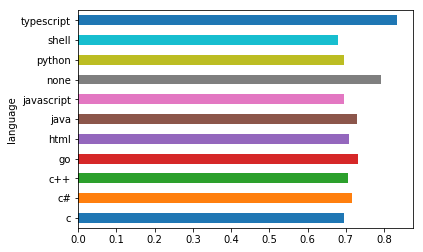

per_overall_kept:


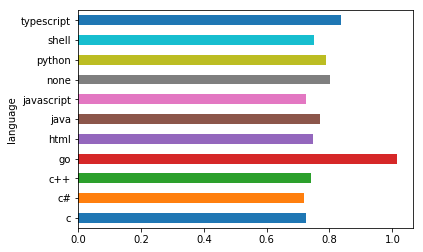

In [192]:
groupby_language_mean_plots()


### Explore the repos readme's that are PYTHON language...

In [193]:
py = df[df.language == 'python']
py.head()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
70,joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...,1234,0.686700,0.764087
71,yongzhuo/nlp_xiaojiang,python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,1.592391,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...,275,0.938567,1.494565
72,dawoudt/JustWatchAPI,python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...,409,1.111413,justwatchapi justwatch com python 3 api instal...,409,justwatchapi justwatch com 3 api install pytho...,292,0.713936,0.793478
73,apple/swift-source-compat-suite,python,Swift Source Compatibility Suite\nSource compa...,197,1130,swift source compatibility suite source compat...,1218,1.077876,swift source compatibility suite source compat...,1218,source compatibility suite source compatibilit...,853,0.700328,0.754867
74,joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...,1234,0.686700,0.764087


In [194]:
py_words = ' '.join(py.clean)
py_words

'joey nmt goal purpose joey nmt framework developed educational purposes aims clean minimalistic code base help novices pursuing understanding following questions implement classic nmt architectures rnn transformer pytorch building blocks architectures interact modify blocks e g deeper wider modify training procedure e g add regularizer contrast nmt frameworks aim state art results speed engineering training tricks since often goes hand increase code complexity decrease readability however joey nmt implements baselines major publications contributors joey nmt developed joost bastings university amsterdam kreutzer heidelberg university features aim implement following features aka minimalist toolkit nmt recurrent encoder decoder grus lstms transformer encoder decoder attention types mlp dot multi head bilinear word bpe character based input handling bleu chrf evaluation beam search length penalty greedy decoding customizable initialization attention visualization learning curve plotting

(-0.5, 399.5, 199.5, -0.5)

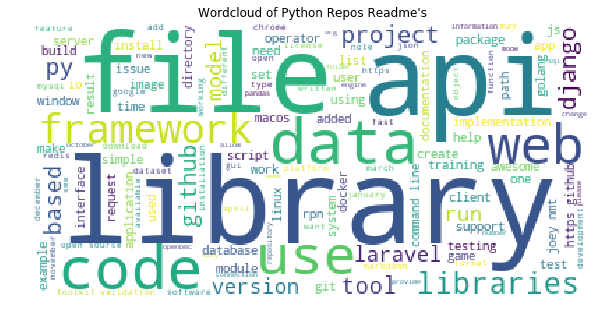

In [195]:
from wordcloud import WordCloud
img = WordCloud(background_color='white').generate(py_words)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title('Wordcloud of Python Repos Readme\'s')
plt.axis('off')

In [196]:
all_words = ' '.join(df.clean)
all_words

'netbsd netbsd free fast secure highly portable unix like open source operating system available wide range platforms large scale servers powerful desktop systems handheld embedded devices building cross build netbsd unix like operating systems build amd64 x86_64 src directory build sh u u j4 amd64 obj release additional build information available building file binaries daily builds releases testing running netbsd system cd usr tests atf run atf report troubleshooting send bugs patches via web form subscribe mailing lists netbsd users list good choice many problems watch current users follow bleeding edge netbsd current join community irc channel netbsd freenode latest sources fetch main cvs repository cvs anoncvs anoncvs netbsd org cvsroot checkout p src work git mirror updated every hours cvs git clone https github com netbsd src git additional links netbsd guide netbsd manual pages netbsd cross reference netbsd netbsd free fast secure highly portable unix like open source operating

### Compare the Python words with the All words collection in a Wordcloud

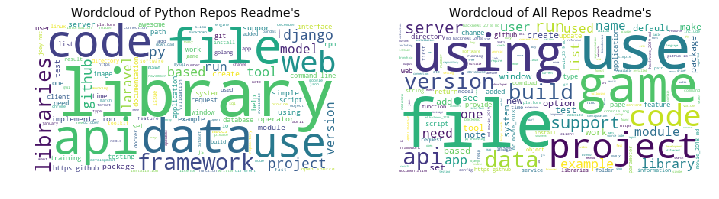

In [197]:
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
img = WordCloud(background_color='white').generate(py_words)
plt.imshow(img)
plt.title('Wordcloud of Python Repos Readme\'s')
plt.axis('off')

plt.subplot(1, 2, 2)
img = WordCloud(background_color='white').generate(all_words)
plt.imshow(img)
plt.title('Wordcloud of All Repos Readme\'s')
plt.axis('off')

# fig.tight_layout(pad=2)

plt.box(False)

# Models!

## Logistic Regression

In [198]:
df.language.value_counts(normalize=True)

python        0.171512
javascript    0.171512
none          0.104651
c++           0.098837
java          0.095930
c#            0.078488
html          0.069767
c             0.069767
shell         0.046512
go            0.046512
typescript    0.046512
Name: language, dtype: float64

In [199]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
1,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
2,sunsettrack4/xmltv_epg,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397
3,andrewrothstein/ansible-vagrant,none,andrewrothstein.vagrant\n\nInstalls vagrant\nR...,2,28,andrewrothstein vagrant installs vagrant requi...,37,1.321429,andrewrothstein vagrant installs vagrant requi...,37,andrewrothstein vagrant installs vagrant requi...,37,1.000000,1.321429
4,voken100g/AutoSSR,none,Free ShadowsocksR免费 ShadowsocksR 服务\nLatest up...,27,616,free shadowsocksr shadowsocksr latest update a...,616,1.000000,free shadowsocksr shadowsocksr latest update a...,616,free shadowsocksr shadowsocksr latest update s...,615,0.998377,0.998377


In [200]:
df.clean.values

array(['netbsd netbsd free fast secure highly portable unix like open source operating system available wide range platforms large scale servers powerful desktop systems handheld embedded devices building cross build netbsd unix like operating systems build amd64 x86_64 src directory build sh u u j4 amd64 obj release additional build information available building file binaries daily builds releases testing running netbsd system cd usr tests atf run atf report troubleshooting send bugs patches via web form subscribe mailing lists netbsd users list good choice many problems watch current users follow bleeding edge netbsd current join community irc channel netbsd freenode latest sources fetch main cvs repository cvs anoncvs anoncvs netbsd org cvsroot checkout p src work git mirror updated every hours cvs git clone https github com netbsd src git additional links netbsd guide netbsd manual pages netbsd cross reference',
       'netbsd netbsd free fast secure highly portable unix like open

In [201]:
df.language.values

array(['none', 'none', 'none', 'none', 'none', 'none', 'none', 'none',
       'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none',
       'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none',
       'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none',
       'none', 'none', 'none', 'none', 'c++', 'c++', 'c++', 'c++', 'c++',
       'c++', 'c++', 'c++', 'c++', 'c++', 'c++', 'c++', 'c++', 'c++',
       'c++', 'c++', 'c++', 'c++', 'c++', 'c++', 'c++', 'c++', 'c++',
       'c++', 'c++', 'c++', 'c++', 'c++', 'c++', 'c++', 'c++', 'c++',
       'c++', 'c++', 'python', 'python', 'python', 'python', 'python',
       'python', 'python', 'python', 'python', 'python', 'python',
       'python', 'python', 'python', 'python', 'python', 'python',
       'python', 'python', 'python', 'python', 'python', 'python',
       'python', 'python', 'python', 'python', 'python', 'python',
       'python', 'python', 'python', 'python', 'python', 'python',
       'python', 'python',

In [202]:
docs = dict(zip(df.language.values, df.clean.values))

In [203]:
docs

{'none': 'osu wiki home osu wiki contributing please see contributing file interested helping project file caching wiki articles articles cached five hours images images cached two hours news posts news posts cached sixty days issues merging news post merge pull request fix tell ephemeral ephemeralis 0001 shiro shiro 1584 osu dev discord osu wiki channel force refresh fixed news post licence majority content repository licensed cc nc 4 0 please see licence file information tl dr use non commercial manner wiki may content third party licences licences cited local content override global licence file please note cover usage osu ppy branding software resources advertising promotion protected trademark law require clearance use terms please contact us',
 'c++': 'ardupilot project ardupilot project made arducopter apm copter code wiki arduplane apm plane code wiki ardurover apmrover2 code wiki ardusub apm sub code wiki antenna tracker code wiki user support discussion forums support forum h

In [204]:
docs.values()

dict_values(['osu wiki home osu wiki contributing please see contributing file interested helping project file caching wiki articles articles cached five hours images images cached two hours news posts news posts cached sixty days issues merging news post merge pull request fix tell ephemeral ephemeralis 0001 shiro shiro 1584 osu dev discord osu wiki channel force refresh fixed news post licence majority content repository licensed cc nc 4 0 please see licence file information tl dr use non commercial manner wiki may content third party licences licences cited local content override global licence file please note cover usage osu ppy branding software resources advertising promotion protected trademark law require clearance use terms please contact us', 'ardupilot project ardupilot project made arducopter apm copter code wiki arduplane apm plane code wiki ardurover apmrover2 code wiki ardusub apm sub code wiki antenna tracker code wiki user support discussion forums support forum http 

In [205]:
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(docs.values())
tfidfs

<11x1251 sparse matrix of type '<class 'numpy.float64'>'
	with 1619 stored elements in Compressed Sparse Row format>

In [206]:
sm = pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())
sm

,00,0001,001e,01,10,100,11,123456,127,1337,...,wrapping,write,writer,writing,written,yes,young,zero,zlib,zone
0,0.000000,0.073344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.022931,0.000000,0.029177,0.000000,0.000000,0.13654,...,0.000000,0.029177,0.000000,0.000000,0.000000,0.000000,0.034135,0.000000,0.000000,0.034135
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.024757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.056896,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.084693,0.000000,0.084693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.053633,0.000000,0.053633,0.053633,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.053633,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.017656,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.022465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.023543,0.000000,0.023543,0.023543,0.015816,0.000000,0.020124,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.023543,0.000000,0.000000,0.023543,0.023543,0.000000


In [207]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

bow_X = tfidf.fit_transform(df.clean)
bow_y = df.language

bow_X_train, bow_X_test, bow_y_train, bow_y_test = train_test_split(bow_X, bow_y, stratify=bow_y, test_size=.2, random_state=random_state)
# not sure if we need to stratify y... so not doing it here... I think this is unneccessary because we dont have unbalanced set.
bow_train = pd.DataFrame(dict(actual=bow_y_train))
bow_test = pd.DataFrame(dict(actual=bow_y_test))


bow_lm = LogisticRegression().fit(bow_X_train, bow_y_train)

bow_train['predicted'] = bow_lm.predict(bow_X_train)
bow_test['predicted'] = bow_lm.predict(bow_X_test)

In [208]:
bow_X_train

<275x22078 sparse matrix of type '<class 'numpy.float64'>'
	with 61087 stored elements in Compressed Sparse Row format>

In [209]:
print('Accuracy for Logistic Regression Model: {:.2%}'.format(accuracy_score(bow_train.actual, bow_train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(bow_train.predicted, bow_train.actual))
print('---')
print(classification_report(bow_train.actual, bow_train.predicted))

Accuracy for Logistic Regression Model: 84.00%
---
Confusion Matrix
actual       c  c#  c++  go  html  java  javascript  none  python  shell  \
predicted                                                                  
c           16   0    0   0     0     0           0     0       0      0   
c#           0  22    0   0     1     0           0     0       0      0   
c++          0   0   27   0     0     0           0     0       0      0   
go           0   0    0   4     0     0           0     0       0      0   
html         0   0    0   0    11     0           0     0       0      0   
java         0   0    0   0     0    26           0     0       0      0   
javascript   1   0    0   5     3     0          46     1       0      2   
none         0   0    0   0     0     0           0    28       0      0   
python       2   0    0   4     4     0           1     0      47      9   
shell        0   0    0   0     0     0           0     0       0      2   
typescript   0   0  

In [210]:
print('Accuracy for Logistic Regression Model: {:.2%}'.format(accuracy_score(bow_test.actual, bow_test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(bow_test.predicted, bow_test.actual))
print('---')
print(classification_report(bow_test.actual, bow_test.predicted))

Accuracy for Logistic Regression Model: 49.28%
---
Confusion Matrix
actual      c  c#  c++  go  html  java  javascript  none  python  shell  \
predicted                                                                 
c           2   0    0   0     0     0           0     0       0      0   
c#          0   4    0   0     0     0           1     0       0      0   
c++         0   0    3   0     0     0           0     0       0      0   
java        0   0    0   0     0     2           0     0       0      0   
javascript  1   0    1   1     4     3           9     1       1      0   
none        0   0    0   0     0     0           0     3       0      0   
python      2   1    3   2     1     2           2     3      11      3   

actual      typescript  
predicted               
c                    0  
c#                   0  
c++                  0  
java                 0  
javascript           2  
none                 0  
python               1  
---
              precision    

# Logistic Regression Model performs poorly on test data at 49%

In [211]:
df.head(3)

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
0,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
1,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
2,sunsettrack4/xmltv_epg,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397


In [212]:
# Have no idea how the first row was duplicated. So just gonna take it out manually...
df = df.iloc[1:]

In [213]:
df.head(2)

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
1,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
2,sunsettrack4/xmltv_epg,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397


In [ ]:
#Insert encoded labels for the languages in order to do the t-SNE

In [219]:
encoder = LabelEncoder()
encoder.fit(df.language)
df[['lang_encoded']] = df[['language']]
df.lang_encoded = encoder.transform(df.lang_encoded)
df.head(2)

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept,lang_encoded
1,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485,7
2,sunsettrack4/xmltv_epg,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397,7


# Using t-SNE to make Visualization
### Use the TFIDFs from this logistic regression model.

In [214]:
vectors = TfidfVectorizer().fit_transform(df.clean)
vectors

<343x22078 sparse matrix of type '<class 'numpy.float64'>'
	with 72027 stored elements in Compressed Sparse Row format>

In [215]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)

In [216]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 343 samples in 0.001s...
[t-SNE] Computed neighbors for 343 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 343 / 343
[t-SNE] Mean sigma: 0.150214
[t-SNE] Computed conditional probabilities in 0.022s
[t-SNE] Iteration 50: error = 69.6423492, gradient norm = 0.4718021 (50 iterations in 0.158s)
[t-SNE] Iteration 100: error = 71.3556900, gradient norm = 0.4377998 (50 iterations in 0.231s)
[t-SNE] Iteration 150: error = 72.6131668, gradient norm = 0.4597472 (50 iterations in 0.180s)
[t-SNE] Iteration 200: error = 67.1746368, gradient norm = 0.5038156 (50 iterations in 0.168s)
[t-SNE] Iteration 250: error = 70.8730011, gradient norm = 0.4318866 (50 iterations in 0.154s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.873001
[t-SNE] Iteration 300: error = 1.2794069, gradient norm = 0.0055304 (50 iterations in 0.145s)
[t-SNE] Iteration 350: error = 1.0773041, gradient norm = 0.0054334 

In [217]:
X_embedded[:, 0]

array([ 7.05791235e+00,  1.76169567e+01,  1.09304390e+01, -1.64416337e+00,
       -1.67192650e+01,  1.30327597e+01, -1.67193623e+01, -7.27467728e+00,
        4.04477453e+00,  1.93416519e+01, -5.41154099e+00,  7.68463898e+00,
        4.40996766e-01, -2.02537990e+00, -8.87897682e+00, -7.79325724e+00,
       -1.07366431e+00,  4.66693115e+00, -2.57927537e+00, -2.38422561e+00,
       -1.30656786e+01, -2.95636445e-01, -1.90429688e-02,  5.81366253e+00,
        1.09307795e+01,  5.81553841e+00,  2.34797835e+00,  1.16004169e+00,
       -7.11713648e+00, -3.83268690e+00, -1.15488148e+01, -2.05634832e+00,
       -5.72770357e+00,  7.30393171e+00,  3.97232509e+00, -5.27465916e+00,
       -6.68838930e+00, -5.27373314e+00,  5.83754206e+00,  8.61201954e+00,
        4.24194813e+00,  7.04683638e+00,  6.89475775e+00,  1.58670819e+00,
        9.20070457e+00,  9.20068550e+00,  1.20524626e+01,  1.20498886e+01,
        9.60215473e+00,  9.18876457e+00,  7.34695768e+00,  5.96203136e+00,
       -1.33130722e+01, -

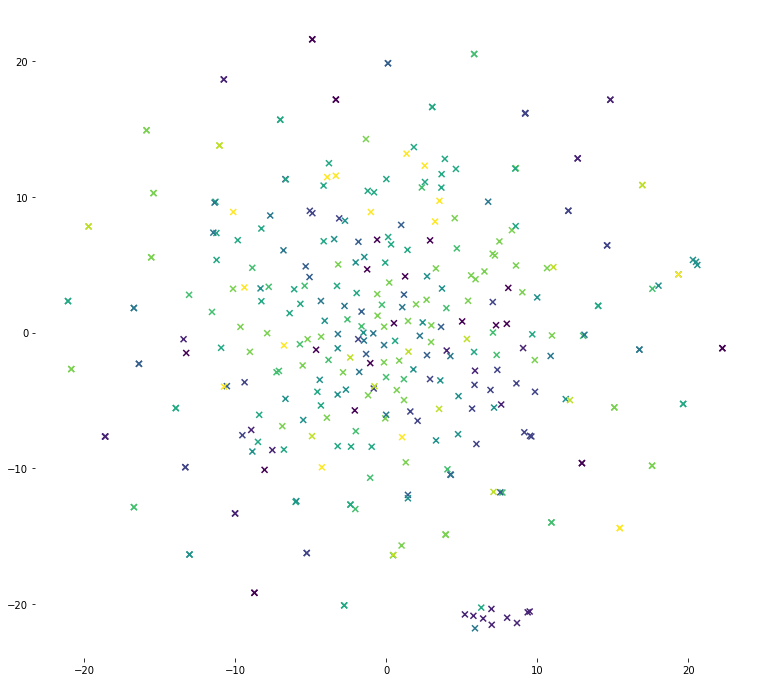

In [220]:
import matplotlib
import matplotlib.pyplot as plt
# fig, ax = plt.subplots()

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
# setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=df.lang_encoded, marker="x")

# More models...
# Perform a train/test split in order to work with some other models...

# Split Train/Test

In [89]:
df.head()

,title,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
1,NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
2,sunsettrack4/xmltv_epg,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397
3,andrewrothstein/ansible-vagrant,none,andrewrothstein.vagrant\n\nInstalls vagrant\nR...,2,28,andrewrothstein vagrant installs vagrant requi...,37,1.321429,andrewrothstein vagrant installs vagrant requi...,37,andrewrothstein vagrant installs vagrant requi...,37,1.000000,1.321429
4,voken100g/AutoSSR,none,Free ShadowsocksR免费 ShadowsocksR 服务\nLatest up...,27,616,free shadowsocksr shadowsocksr latest update a...,616,1.000000,free shadowsocksr shadowsocksr latest update a...,616,free shadowsocksr shadowsocksr latest update s...,615,0.998377,0.998377
5,tolo7010/hak.lnk,none,hak.lnk\nProject Name: hak.lnk\nDescription: R...,18,64,hak lnk project name hak lnk description resou...,59,0.921875,hak lnk project name hak lnk description resou...,59,hak lnk project name hak lnk description resou...,48,0.813559,0.750000


In [90]:
df = df[['clean','language']]

In [91]:
X = df.clean
y = df.language
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

## Naive Bayes Model

In [92]:
# Define what the languages are... Since we are only using the top occuring languages, this list will be smaller than the first language list.

my_tags = list(df.language.unique())
my_tags

['none',
 'c++',
 'python',
 'javascript',
 'html',
 'go',
 'java',
 'typescript',
 'c#',
 'c',
 'shell']

In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('Accuracy for Naive Bayes Model %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.3 µs
Accuracy for Naive Bayes Model 0.2621359223300971
              precision    recall  f1-score   support

        none       0.00      0.00      0.00         8
         c++       0.67      0.40      0.50         5
      python       1.00      0.22      0.36         9
  javascript       0.00      0.00      0.00         2
        html       0.00      0.00      0.00         8
          go       1.00      0.09      0.17        11
        java       0.17      0.94      0.29        16
  typescript       1.00      0.18      0.31        11
          c#       0.83      0.22      0.34        23
           c       0.00      0.00      0.00         5
       shell       0.00      0.00      0.00         5

   micro avg       0.26      0.26      0.26       103
   macro avg       0.42      0.19      0.18       103
weighted avg       0.55      0.26      0.23       103



# Linear Support Vector Machine

In [96]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

%time

y_pred = sgd.predict(X_test)

print('Accuracy for SVM %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs
Accuracy for SVM 0.49514563106796117
              precision    recall  f1-score   support

        none       1.00      0.50      0.67         8
         c++       0.38      0.60      0.46         5
      python       0.54      0.78      0.64         9
  javascript       1.00      0.50      0.67         2
        html       0.40      0.25      0.31         8
          go       0.50      0.36      0.42        11
        java       0.37      0.69      0.48        16
  typescript       0.42      0.45      0.43        11
          c#       0.75      0.52      0.62        23
           c       0.50      0.40      0.44         5
       shell       0.00      0.00      0.00         5

   micro avg       0.50      0.50      0.50       103
   macro avg       0.53      0.46      0.47       103
weighted avg       0.54      0.50      0.49       103



## Linear SVM performs much better at 49.5% accuracy.

# Logistic Regression Number 2

In [98]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

%time

y_pred = logreg.predict(X_test)

print('Accuracy of Logistic Regression Model 2 %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11 µs
Accuracy of Logistic Regression Model 2 0.5048543689320388
              precision    recall  f1-score   support

        none       1.00      0.50      0.67         8
         c++       0.50      0.60      0.55         5
      python       0.50      0.78      0.61         9
  javascript       1.00      0.50      0.67         2
        html       0.40      0.25      0.31         8
          go       0.43      0.27      0.33        11
        java       0.34      0.75      0.47        16
  typescript       0.57      0.36      0.44        11
          c#       0.70      0.61      0.65        23
           c       0.67      0.40      0.50         5
       shell       0.00      0.00      0.00         5

   micro avg       0.50      0.50      0.50       103
   macro avg       0.56      0.46      0.47       103
weighted avg       0.54      0.50      0.49       103



# Logistic Regression Model 2 performs poorly at 50%.

In [99]:
import gensim

# Word2vec and Logistic Regression


In [100]:
print(gensim.__version__)

3.7.3


### Use gensim to load a word2vec model pretrained on google news and perform some simple actions with the word vectors.

In [101]:
from gensim.models import Word2Vec
path = '~/Documents/Coding/Codeup/CourseWork/ds-methodologies-exercises/nlp/'
file = "GoogleNews-vectors-negative300.bin.gz"
wv = gensim.models.KeyedVectors.load_word2vec_format(path+file, binary=True)
wv.init_sims(replace=True)

###  Normalize the word2vec vectors first, so they all have equal length. 

### Load up a Google News model. 

In [102]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

### Define some functions to perform Bag of Words analysis on the word vectors. Simple stuff like word averaging, summation, and weighted addition.

In [103]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [104]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

### Tokenize the text, Train/Test split...

In [105]:
df.head()

,clean,language
1,netbsd netbsd free fast secure highly portable...,none
2,easyepg project free platform download epg dat...,none
3,andrewrothstein vagrant installs vagrant requi...,none
4,free shadowsocksr shadowsocksr latest update s...,none
5,hak lnk project name hak lnk description resou...,none


In [106]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['clean']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['clean']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [107]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['language'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.language))
print(classification_report(test.language, y_pred,target_names=my_tags))

accuracy 0.3786407766990291
              precision    recall  f1-score   support

        none       0.50      0.50      0.50         8
         c++       0.38      0.60      0.46         5
      python       0.38      0.67      0.48         9
  javascript       0.33      0.50      0.40         2
        html       0.67      0.50      0.57         8
          go       0.23      0.27      0.25        11
        java       0.33      0.50      0.40        16
  typescript       0.50      0.18      0.27        11
          c#       0.55      0.26      0.35        23
           c       0.40      0.40      0.40         5
       shell       0.00      0.00      0.00         5

   micro avg       0.38      0.38      0.38       103
   macro avg       0.39      0.40      0.37       103
weighted avg       0.42      0.38      0.37       103



## The Word2vec and Logistic Regression model performs at 37.86% accuracy.

# Decision Tree

## Let's take the predictions from our Logistic Regression and merge those into train and test sets.  The predictions from LR will be used as a feature in a different model.  As of now, we have only really used the bag of words as the feature.  We'd like to use length of readme, etc. as features.

## Let's encode our y-value to use in a decision tree.

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
lang_groups = pd.DataFrame(df.language.unique())
lang_groups.columns = ['language']
lang_groups

,language
0,none
1,c++
2,python
3,javascript
4,html
5,go
6,java
7,typescript
8,c#
9,c


In [110]:
encoder = LabelEncoder()
encoder.fit(lang_groups.language)
lang_groups[['lang_encoded']] = lang_groups[['language']]
lang_groups.lang_encoded = encoder.transform(lang_groups.lang_encoded)
lang_groups

,language,lang_encoded
0,none,7
1,c++,2
2,python,8
3,javascript,6
4,html,4
5,go,3
6,java,5
7,typescript,10
8,c#,1
9,c,0


In [111]:
bow_train_preds = pd.DataFrame(bow_train.predicted)
bow_train_preds.head()

,predicted
316,c
208,python
64,c++
137,javascript
92,python


In [112]:
bow_test_preds = pd.DataFrame(bow_test.predicted)
bow_test_preds.head()

,predicted
66,c++
171,python
256,javascript
49,c++
235,python


In [113]:
X_train = pd.merge(bow_train, df, left_index=True, right_index=True)
X_train.drop(columns=['actual', 'language'], inplace=True)
X_train.rename(columns={'lang_encoded':'pred_lang_encoded'}, inplace=True)
X_train.head(3)

,predicted,clean
316,c,rt thread rt thread open source iot operating ...
208,python,3d object maker 3d object maker compatible mod...
64,c++,susa open source project susa mathematics sign...


In [114]:
X_test = pd.merge(bow_test, df, left_index=True, right_index=True)
X_test.drop(columns=['actual', 'language'], inplace=True)
X_test.rename(columns={'lang_encoded':'pred_lang_encoded'}, inplace=True)
X_test.head(3)

,predicted,clean
66,c++,mame build status tiny build containing core p...
171,python,kurento rtmp simple demo provide pipeline kure...
256,javascript,recursive tile map growth simple recursive alg...


In [115]:
y_train = pd.DataFrame(bow_train.actual)
y_train = pd.merge(y_train, pd.DataFrame(df.language), right_index=True, left_index=True)
y_train.head(3)

,actual,language
316,c,c
208,html,html
64,c++,c++


In [116]:
y_train = pd.merge(y_train, lang_groups, how='left', on='language')
y_train.head(3)

,actual,language,lang_encoded
0,c,c,0
1,html,html,4
2,c++,c++,2


In [117]:
y_test = pd.DataFrame(bow_test.actual)
y_test = pd.merge(y_test, pd.DataFrame(df.language), right_index=True, left_index=True)
y_test.head(3)

,actual,language
66,c++,c++
171,javascript,javascript
256,java,java


In [118]:
y_test = pd.merge(y_test, lang_groups, how='left', on='language')
y_test.head(3)

,actual,language,lang_encoded
0,c++,c++,2
1,javascript,javascript,6
2,java,java,5


In [119]:
y_train.drop(columns=['actual', 'language'], inplace=True)
y_test.drop(columns=['actual', 'language'], inplace=True)

In [120]:
X_train[['pred_lang_encoded']] = X_train[['predicted']]
X_train[['language']] = X_train[['predicted']]
X_train = pd.merge(X_train, lang_groups, how='left', on='language')
X_train.drop(columns=['language', 'pred_lang_encoded'], inplace=True)
X_train.rename(index=str, columns={'lang_encoded': 'pred_lang_encoded'}, inplace=True)
X_train.head(3)

,predicted,clean,pred_lang_encoded
0,c,rt thread rt thread open source iot operating ...,0
1,python,3d object maker 3d object maker compatible mod...,8
2,c++,susa open source project susa mathematics sign...,2


In [121]:
X_test[['pred_lang_encoded']] = X_test[['predicted']]
X_test[['language']] = X_test[['predicted']]
X_test = pd.merge(X_test, lang_groups, how='left', on='language')
X_test.drop(columns=['language', 'pred_lang_encoded'], inplace=True)
X_test.rename(index=str, columns={'lang_encoded': 'pred_lang_encoded'}, inplace=True)
X_test.head(3)

,predicted,clean,pred_lang_encoded
0,c++,mame build status tiny build containing core p...,2
1,python,kurento rtmp simple demo provide pipeline kure...,8
2,javascript,recursive tile map growth simple recursive alg...,6


In [122]:
clf_X_train = X_train[['stars', 'original_cnt', 'pred_lang_encoded', 'word_cnt_after_stop']]
clf_X_test = X_test[['stars', 'original_cnt', 'pred_lang_encoded', 'word_cnt_after_stop']]

KeyError: "['stars' 'original_cnt' 'word_cnt_after_stop'] not in index"

In [123]:
# clf_X_train = X_train[['stars', 'word_cnt_after_stop']]
# clf_X_test = X_test[['stars', 'word_cnt_after_stop']]

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [125]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=random_state, min_samples_leaf=4)

In [126]:
clf.fit(clf_X_train, y_train)

NameError: name 'clf_X_train' is not defined

In [387]:
train_clf_y_pred = clf.predict(clf_X_train)
train_clf_y_pred[:5]

array([0, 8, 2, 6, 8])

In [388]:
train_clf_y_pred_proba = clf.predict_proba(clf_X_train)
train_clf_y_pred_proba[:5]

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.25      , 0.        , 0.        , 0.        , 0.125     ,
        0.        , 0.        , 0.        , 0.5       , 0.125     ,
        0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.04651163, 0.06976744,
        0.        , 0.02325581, 0.        , 0.74418605, 0.11627907,
        0.        ]])

In [389]:
print('Accuracy of Decision Tree classifier on training set: {:.4f}'
     .format(clf.score(clf_X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.8436


In [390]:
from sklearn.metrics import confusion_matrix

In [391]:
print('Train Confusion Matrix')
labels = sorted(df.language.unique())
pd.DataFrame(confusion_matrix(y_train, train_clf_y_pred), index=labels, columns=labels)

Train Confusion Matrix


,c,c#,c++,go,html,java,javascript,none,python,shell,typescript
c,16,0,0,0,0,0,1,0,2,0,0
c#,0,22,0,0,0,0,0,0,0,0,0
c++,0,0,27,0,0,0,0,0,0,0,0
go,0,0,0,6,0,0,3,0,2,2,0
html,0,1,0,0,11,0,3,0,4,0,0
java,0,0,0,0,0,26,0,0,0,0,0
javascript,0,0,0,1,0,0,45,0,1,0,0
none,0,0,0,1,0,0,0,28,0,0,0
python,0,0,0,0,0,0,0,0,46,1,0
shell,0,0,0,0,0,0,2,0,6,5,0


In [392]:
print(classification_report(y_train, train_clf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.96      1.00      0.98        22
           2       1.00      1.00      1.00        27
           3       0.67      0.46      0.55        13
           4       1.00      0.58      0.73        19
           5       0.96      1.00      0.98        26
           6       0.71      0.96      0.82        47
           7       1.00      0.97      0.98        29
           8       0.75      0.98      0.85        47
           9       0.50      0.38      0.43        13
          10       0.00      0.00      0.00        13

   micro avg       0.84      0.84      0.84       275
   macro avg       0.78      0.74      0.75       275
weighted avg       0.82      0.84      0.82       275



In [393]:
test_clf_y_pred = clf.predict(clf_X_test)
test_clf_y_pred[:5]

array([2, 8, 6, 2, 8])

In [394]:
print('Accuracy of Decision Tree classifier on test set: {:.4f}'
     .format(clf.score(clf_X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.4928


In [395]:
df[df.language == 'javascript'].describe()

,stars,original_cnt,article_cnt,article_per_kept,lemm_cnt,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,207.152542,702.847458,747.711864,1.045074,747.711864,505.220339,0.694892,0.726412
std,912.974370,2034.525454,2187.468463,0.132487,2187.468463,1463.121781,0.119134,0.166934
min,2.000000,14.000000,9.000000,0.310345,9.000000,7.000000,0.465517,0.241379
25%,2.000000,103.000000,109.000000,1.015686,109.000000,80.500000,0.617823,0.635399
50%,6.000000,213.000000,225.000000,1.059437,225.000000,145.000000,0.676254,0.732394
75%,59.000000,517.000000,505.500000,1.095238,505.500000,392.500000,0.731623,0.771930
max,5307.000000,14730.000000,15930.000000,1.320755,15930.000000,10701.000000,0.988304,1.301887


In [396]:
df.language[df.language == 'javascript'].unique()

array(['javascript'], dtype=object)

In [397]:
print('Test Confusion Matrix')
labels = sorted(df.language.unique())
pd.DataFrame(confusion_matrix(y_test, test_clf_y_pred), index=labels, columns=labels)

Test Confusion Matrix


,c,c#,c++,go,html,java,javascript,none,python,shell,typescript
c,2,0,0,0,0,0,1,0,2,0,0
c#,0,4,0,0,0,0,0,0,1,0,0
c++,0,0,3,0,0,0,1,0,2,1,0
go,0,0,0,0,0,0,1,0,2,0,0
html,0,0,0,0,0,0,4,0,1,0,0
java,0,0,0,0,0,2,3,0,2,0,0
javascript,0,1,0,0,0,0,9,0,2,0,0
none,0,0,0,0,0,0,1,3,0,3,0
python,0,0,0,0,0,0,1,0,10,1,0
shell,0,0,0,0,0,0,0,0,2,1,0


In [398]:
print(classification_report(y_test, test_clf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.80      0.80      0.80         5
           2       1.00      0.43      0.60         7
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       1.00      0.29      0.44         7
           6       0.39      0.75      0.51        12
           7       1.00      0.43      0.60         7
           8       0.40      0.83      0.54        12
           9       0.17      0.33      0.22         3
          10       0.00      0.00      0.00         3

   micro avg       0.49      0.49      0.49        69
   macro avg       0.52      0.39      0.39        69
weighted avg       0.58      0.49      0.46        69



In [381]:
import graphviz

from graphviz import Graph

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

graph.render('readme_decision_tree', view=True)

'readme_decision_tree.pdf'

## Get some new random data

In [151]:
# this function will give a list of urls from a RANDOM page on GitHub.
def get_random_urls_list():
    '''Generates a list of 10 urls from a random page on GitHubs Most Recently Updated repos'''
    pg = random.choice(range(101))
    urls = []
    headers = {'User-Agent': 'Student'}
    url = 'https://github.com/search?o=desc&p='+ str(pg) + '&q=stars%3A%3E1&s=updated&type=Repositories'
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    repo = soup.findAll('li', class_='repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source')
    for div in repo:
        one = []
        one.append(re.findall(r'.*/.*',div.text)[0])
        urls.append(one)
#     print(len(urls))        
#         print(urls)
    final_urls = []
    for url in urls:
        url = 'https://github.com/'+url[0]
        final_urls.append(url)
    return final_urls

In [335]:
def clean(text):
    '''A simple function to cleanup text data'''
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [336]:
# Depends upon get_random_urls_list() function
def rand_url():
    '''Finds a random item from a list of urls. That list of urls is generated by another function, get_random_url_list()'''
    return random.choice(get_random_urls_list())

In [337]:
random_url = rand_url()
random_url

'https://github.com/pytorch/pytorch'

In [338]:
# This function depends on random_url() function, which finds a random url.
def new_rand_readme():
    '''Finds the readme file from the randomly generated url on GitHubs Most Recently Updated repos'''
    headers = {'User-Agent': 'Student'}
    response = get(random_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    read_me = soup.find(class_='markdown-body entry-content p-5')
    read_me.text
    test_text = ' '.join(clean(read_me.text))
    return test_text

In [339]:
new_rand_readme()

'pytorch python package provides two highlevel feature tensor computation like numpy strong gpu acceleration deep neural network built tapebased autograd system reuse favorite python package numpy scipy cython extend pytorch needed pytorch installation binary source docker image building documentation previous version getting started communication release contributing team system 27 35 36 linux cpu linux gpu window cpu gpu linux ppc64le cpu linux ppc64le gpu see also cipytorchorg hud pytorch granular level pytorch library consists following component component description torch tensor library like numpy strong gpu support torchautograd tapebased automatic differentiation library support differentiable tensor operation torch torchjit compilation stack torchscript create serializable optimizable model pytorch code torchnn neural network library deeply integrated autograd designed maximum flexibility torchmultiprocessing python multiprocessing magical memory sharing torch tensor across pr

## Predict

In [340]:
def predict(unknown_text):
    return lm.predict(tfidf.transform([unknown_text]))[0]

In [341]:
print('Predicted the following language, ', predict(new_rand_readme()),',', 'for the following README.md file:', new_rand_readme())

Predicted the following language,  python , for the following README.md file: pytorch python package provides two highlevel feature tensor computation like numpy strong gpu acceleration deep neural network built tapebased autograd system reuse favorite python package numpy scipy cython extend pytorch needed pytorch installation binary source docker image building documentation previous version getting started communication release contributing team system 27 35 36 linux cpu linux gpu window cpu gpu linux ppc64le cpu linux ppc64le gpu see also cipytorchorg hud pytorch granular level pytorch library consists following component component description torch tensor library like numpy strong gpu support torchautograd tapebased automatic differentiation library support differentiable tensor operation torch torchjit compilation stack torchscript create serializable optimizable model pytorch code torchnn neural network library deeply integrated autograd designed maximum flexibility torchmultipr